# Regresión Logística


## El Neurona Artificial


Sumergámonos en el corazón del asunto: el neurona artificial.

La figura de abajo muestra cómo funciona un neurona artificial:

![Neurona Artificial](./images/NeuroneArtificiel.png)

Un neurona artificial recibe un vector $\mathbf{x}=(x_1,x_2,...,x_n)$ como entrada. Cada elemento $x_i$ del vector $\mathbf{x}$ se multiplica por un peso $w_i$, luego se calcula la suma y se añade un sesgo $b$. Esta suma se pasa entonces a través de una función llamada **función de activación** $\phi$.
$Output = \phi(\sum_{i=0}^{n} w_i x_i  + b)$
Este proceso se llama neurona artificial porque se inspira en el funcionamiento de un [neurona biológico](https://en.wikipedia.org/wiki/Artificial_neuron).


## Funciones de Activación


**Función de Heaviside:** Originalmente, la primera neurona artificial ([el perceptrón](https://fr.wikipedia.org/wiki/Perceptron)) utilizaba una función de umbral como función de activación. Esto permite tomar una decisión (0 o 1) basada en la suma ponderada y un umbral definido.
$heaviside(x) = \left\{
    \begin{array}{ll}
        1 & \text{si } x > 0 \\
        0 & \text{de lo contrario}
    \end{array}
\right. \text{con } x=\sum_{i=0}^{n} w_i x_i  + b$
Esta función de activación es efectiva para la clasificación binaria, pero no funciona para múltiples clases. Además, la función no es diferenciable, lo que complica el uso del algoritmo de descenso de gradiente para optimizar los pesos $w_i$ de la neurona.

Las funciones de activación recientes son mucho más interesantes para entrenar redes neuronales usando descenso de gradiente. Primero, son diferenciables, lo que permite la aplicación de nuestro algoritmo de descenso de gradiente. Segundo, son no lineales, lo que permite a las redes aprender representaciones complejas. También hay otras ventajas específicas para cada función de activación.

Una de las funciones de activación "recientes" es la función sigmoide, que detallamos aquí:

**Función Sigmoide:** Otra función de activación particularmente interesante debido a su analogía con la probabilidad es la función sigmoide. Esta vez, la función permite obtener un valor entre 0 y 1 usando la fórmula:
$sigmoid(x) = \frac{1}{1 + e^{-x}} \text{ con } x=\sum_{i=0}^{n} w_i x_i  + b$


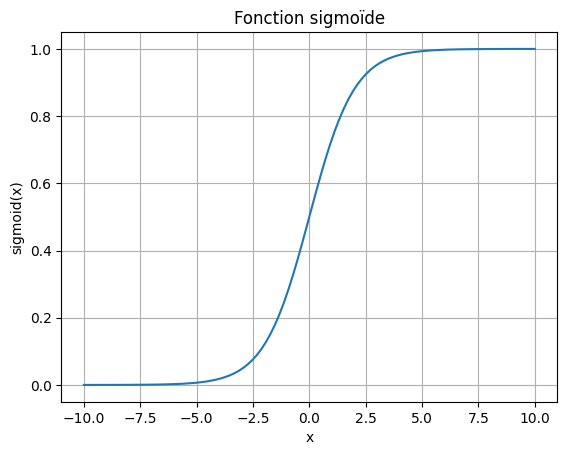

In [1]:
# Tracé de la fonction sigmoïde
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.title('Fonction sigmoïde')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()

Esta función es diferenciable, y su derivada es:
$sigmoid'(x) = sigmoid(x) \cdot (1 - f(x))$
Por lo tanto, podemos aplicar el descenso de gradiente a nuestra neurona artificial cuando usamos esta función de activación.

Hay muchas otras [funciones de activación](https://fr.wikipedia.org/wiki/Fonction_d%27activation) cada una con sus propios usos. Las veremos en los siguientes cursos. ($Tanh$, $ReLU$, $Softmax$)


## Aplicación


Para entender completamente la regresión logística, nada supera un ejemplo concreto.

En este ejemplo, determinaremos si un estudiante será admitido en su universidad soñada basada en tres piezas de información: su puntuación en el examen de ingreso, su promedio de calificaciones del año anterior y la calidad de su carta de motivación.

No conocemos el método de cálculo para admitir o rechazar a un estudiante, pero tenemos los datos y las decisiones correspondientes.

La información de entrada va de 0 a 1, con 1 indicando la mejor puntuación. Admitido = 1 corresponde a la admisión, mientras que Admitido = 0 corresponde al rechazo.


In [2]:
from tabulate import tabulate

# Définition des données d'entraînement
values_train = [[0.7, 0.8, 0.1], [0.4, 0.9, 0.5], [0.2, 0.3, 0.9], [0.9, 0.9, 0.6]]
labels_train = [1, 0, 0, 1]

# Ajout des noms de colonnes
data = [['Examen', 'Moyenne', 'Motivation', 'Admis']]
data.extend([[values_train[i][0], values_train[i][1], values_train[i][2], labels_train[i]] for i in range(len(values_train))])

# Affichage du tableau
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid"))

╒══════════╤═══════════╤══════════════╤═════════╕
│   Examen │   Moyenne │   Motivation │   Admis │
╞══════════╪═══════════╪══════════════╪═════════╡
│      0.7 │       0.8 │          0.1 │       1 │
├──────────┼───────────┼──────────────┼─────────┤
│      0.4 │       0.9 │          0.5 │       0 │
├──────────┼───────────┼──────────────┼─────────┤
│      0.2 │       0.3 │          0.9 │       0 │
├──────────┼───────────┼──────────────┼─────────┤
│      0.9 │       0.9 │          0.6 │       1 │
╘══════════╧═══════════╧══════════════╧═════════╛


Nuestro objetivo en este problema es determinar si los estudiantes con las puntuaciones $[Exam=0.8, Average=0.7, Motivation=0.2]$ y $[Exam=0.4, Average=0.5, Motivation=0.9]$ fueron admitidos.


Has entendido que los datos $Exam$, $Average$ y $Motivation$ corresponden a nuestros $x_i$. Nuestro objetivo con la regresión logística es encontrar un valor óptimo para los $w_i$ que se alinee con nuestros datos de entrenamiento.

Para simplificar, definamos $x_0=Exam$, $x_1=Average$, $x_2=Motivation$ y $y_{true}=Admitted$.


### Función de Costo


En nuestro ejemplo de descenso de gradiente, nuestro objetivo era encontrar el mínimo de una función. Estos son los escenarios donde el descenso de gradiente sobresale. Para nuestro nuevo problema, necesitamos encontrar una función que, al minimizarse, mejore las predicciones.

En nuestra clasificación binaria, $y_{true}$ es 1 si el estudiante es admitido y 0 en caso contrario.

Nuestro objetivo es predecir si el estudiante es admitido o no prediciendo la salida $pred$.

Durante el entrenamiento, queremos entrenar nuestro modelo de regresión logística para predecir $pred \approx y_{true}$.

Para hacerlo, usamos la función de verosimilitud negativa, que se expresa de la siguiente manera:
$\text{loss} = - \left( y_{\text{true}} \cdot \log(\text{pred}) + (1 - y_{\text{true}}) \cdot \log(1 - \text{pred}) \right)$

Para más detalles sobre la regresión logística y la pérdida de verosimilitud negativa, puedes consultar este [enlace](https://blog.demir.io/understanding-logistic-regression-26802c0da856).


Lo importante es entender cómo varía esta función en función de nuestra predicción $pred$ y la etiqueta $y_{true}$.

Para esto, consideremos el caso donde la etiqueta es $y_{true}=1$. Analicemos dos escenarios:

Si $pred=0.9$, lo que significa que nuestro modelo predice un 90% de probabilidad de admisión (una buena predicción), entonces:
$\text{loss} = - \left( 1.0 \cdot \log(0.9) + (1 - 1.0) \cdot \log(1 - 0.9) \right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.9) + 0 \cdot \log(1 - 0.9) \right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.9)\right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.9)\right)$
$\text{loss} = 0.046$
La pérdida es baja, lo cual es bueno porque la predicción es precisa.

Si $pred=0.2$, lo que significa que nuestro modelo predice un 20% de probabilidad de admisión (una mala predicción), entonces:
$\text{loss} = - \left( 1.0 \cdot \log(0.2) + (1 - 1.0) \cdot \log(1 - 0.2) \right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.2) + 0 \cdot \log(1 - 0.2) \right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.2)\right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.2)\right)$
$\text{loss} = 0.70$
La pérdida es alta, lo cual es bueno porque la predicción es pobre.

Para un caso donde $y_{true}=0$, encontramos una pérdida baja cuando $pred$ está cerca de 0 y una pérdida alta cuando $pred$ está cerca de 1 (puedes hacer el cálculo para practicar si es necesario).


### Calculando Derivadas


Ahora que tenemos una función para minimizar, es necesario calcular la derivada de esta función con respecto a cada uno de los pesos $w_0$, $w_1$, $w_2$ y $b$.

Por lo tanto, debemos calcular $\frac{\partial loss}{\partial w_0}$, $\frac{\partial loss}{\partial w_1}$, $\frac{\partial loss}{\partial w_2}$ y $\frac{\partial loss}{\partial b}$.

Para los pesos $w_0$, $w_1$ y $w_2$, la derivada se calcula de la misma manera.

Usando la regla de la cadena, para $w_0$, tenemos:
$\frac{\partial loss}{\partial w_0} = \frac{\partial loss}{\partial pred} \cdot \frac{\partial pred}{\partial w_0}$

Como recordatorio, nuestra predicción $pred$ corresponde a la salida de nuestra regresión logística con la función de activación $sigmoid$.

Para el primer término, la derivada de la pérdida con respecto a $pred$ da:
$\frac{\partial loss}{\partial pred} = -(\frac{y_{true}}{pred} - \frac{1-y_{true}}{1-pred}) $
El cálculo no se detallará aquí, pero puedes hacerlo tú mismo para verificar.

Para el segundo término, la derivada de $pred$ con respecto a $w_0$ da:
$\frac{\partial pred}{\partial w_0} = pred \cdot (1-pred) \cdot x_0$

Combinando los dos términos, obtenemos:
$\frac{\partial loss}{\partial w_0} =-(\frac{y_{true}}{pred} - \frac{1-y_{true}}{1-pred}) \cdot pred \cdot (1-pred) \cdot x_0$

Y después de simplificación (mágicamente),
$\frac{\partial loss}{\partial w_0} = (pred-y_{true}) \cdot x_0$

Sin detallar el cálculo, también obtenemos:
$\frac{\partial loss}{\partial b} = pred-y_{true}$


### Regresión Logística


Ahora que tenemos todos los elementos,
definamos nuestra función de regresión logística en Python:


In [3]:
# Notre classe de regression logistique
class logistic_regression():
  def __init__(self) -> None:
    self.w0=np.random.randn()
    self.w1=np.random.randn()
    self.w2=np.random.randn()
    self.b=0
  def __call__(self,x0,x1,x2):
    # Somme pondérée et ajout du biais
    pond=self.w0*x0+self.w1*x1+self.w2*x2+self.b
    # Application de la sigmoïde
    pred=sigmoid(pond)
    return pred
    
def loss(y_true, y_pred):
  # Calcul du loss (log vraisemblance négative)
  loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss
    

def update_weights(model,pred, x0, x1, x2, y_true, learning_rate):
       
  # On calcule les dérivées en fonction des poids et du biais 
  dL_dw0 = (pred - y_true) * x0
  dL_dw1 = (pred - y_true) * x1
  dL_dw2 = (pred - y_true) * x2
  dL_db = pred - y_true
      
  # On modifie les paramètres pour réduire le loss 
  # La modification des poids dépend du learning rate, du signe de la dérivée et de la valeur de la dérivée
  model.w0 -= learning_rate * dL_dw0
  model.w1 -= learning_rate * dL_dw1
  model.w2 -= learning_rate * dL_dw2
  model.b -= learning_rate * dL_db

In [4]:

# Initialisation du modèle et des hyperparamètres
learning_rate = 0.01
epochs = 1000 # le nombre d'itérations d'entrainement
model = logistic_regression()

Antes de entrenar el modelo, probemos nuestras predicciones en los dos estudiantes cuyos resultados de admisión queremos conocer.


In [5]:
values_test=[[0.8,0.7,0.7],[0.4,0.5,0.9]]
for value in values_test:
  x0,x1,x2=value
  pred = model(x0, x1, x2)
  print("L'élève avec Examen = "+str(x0)+ ", Moyenne = "+str(x1)+" et Motivation = "+str(x2)+ " a "+str(round(pred*100)) + "% de chance d'être admis")

L'élève avec Examen = 0.8, Moyenne = 0.7 et Motivation = 0.7 a 60% de chance d'être admis
L'élève avec Examen = 0.4, Moyenne = 0.5 et Motivation = 0.9 a 59% de chance d'être admis


Podemos ver que el modelo es muy incierto y da probabilidades aleatorias, lo cual es lógico ya que sus pesos se inicializan aleatoriamente.

Ahora, entremos el modelo con nuestros datos de entrenamiento.


In [9]:
# Entraînement
for epoch in range(epochs):
  # Mise à jour des poids pour chaque exemple
  total_loss = 0
  for (x0, x1, x2), y_true in zip(values_train, labels_train):
    pred = model(x0, x1, x2)
    update_weights(model,pred, x0, x1, x2, y_true, learning_rate)
    total_loss += loss(y_true, pred)

  avg_loss = total_loss / len(labels_train)
  
  # Affichage de la perte pour suivre la progression de l'entraînement
  if ((epoch + 1) % 5000 == 0) or (epoch==0):
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}")

Epoch 1/40000, Loss: 0.01468091027998586
Epoch 5000/40000, Loss: 0.013032955086147595
Epoch 10000/40000, Loss: 0.011715352279809266
Epoch 15000/40000, Loss: 0.010638348324912276
Epoch 20000/40000, Loss: 0.009741762611763436
Epoch 25000/40000, Loss: 0.008983896958517028
Epoch 30000/40000, Loss: 0.008334957514714105
Epoch 35000/40000, Loss: 0.007773096000082178
Epoch 40000/40000, Loss: 0.007281930357182074


In [10]:
print(model.w0, model.w1, model.w2, model.b)

for value in values_test:
  x0,x1,x2=value
  pred = model(x0, x1, x2)
  print("L'élève avec Examen = "+str(x0)+ ", Moyenne = "+str(x1)+" et Motivation = "+str(x2)+ " a "+str(round(pred*100)) + "% de chance d'être admis")

19.464301071981186 -3.27230109363944 -8.244865180820856 -4.903197398150705
L'élève avec Examen = 0.8, Moyenne = 0.7 et Motivation = 0.7 a 93% de chance d'être admis
L'élève avec Examen = 0.4, Moyenne = 0.5 et Motivation = 0.9 a 0% de chance d'être admis


Como podemos ver, nuestro modelo ahora es mucho más confiado en sus predicciones y nos da predicciones consistentes con los datos de entrenamiento.
